# Functional API in Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

## Input Layer

**Explanation:**

`Input(shape=(20,))` creates an input layer that expects input vectors of length 20.

`print(input_layer)` shows the layer information, helping you understand the type of information you can get about the layers.

In [ ]:
input_layer = Input(shape=(20,))
input_layer

<KerasTensor shape=(None, 20), dtype=float32, sparse=False, name=keras_tensor>

## Hidden Layer

**Explanation:**

`Dense(64, activation='relu')` creates a dense (fully connected) layer with 64 units and ReLU activation function.

Each hidden layer takes the output of the previous layer as its input.

In [ ]:
hidden_layer1 = Dense(64, activation="relu")(input_layer)
hidden_layer2 = Dense(64, activation="relu")(hidden_layer1)

## Output Layer

**Explanation:**

`Dense(1, activation='sigmoid')` creates a dense layer with 1 unit and a sigmoid activation function, suitable for binary classification.

In [ ]:
output_layer = Dense(1, activation="sigmoid")(hidden_layer2)

## Create and Compile Model

**Explanation:**

`Model(inputs=input_layer, outputs=output_layer)` creates a Keras model that connects the input layer to the output layer through the hidden layers.

`model.summary()` provides a summary of the model, showing the layers, their shapes, and the number of parameters. This helps you interpret the model architecture.

In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation:**

`optimizer='adam'` specifies the Adam optimizer, a popular choice for training neural networks.

`loss='binary_crossentropy'` specifies the loss function for binary classification problems.

`metrics=['accuracy']` instructs Keras to evaluate the model using accuracy during training.

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Model Training

**Explanation:**

`X_train` and `y_train` are placeholders for your actual training data.

`model.fit` trains the model for a specified number of epochs and batch size.

In [ ]:
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5113 - loss: 0.6958
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5383 - loss: 0.6893
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5229 - loss: 0.6882
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5633 - loss: 0.6834
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5790 - loss: 0.6810
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5987 - loss: 0.6786
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 0.6807
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.6665
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6071 - loss: 0.6693
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6287 - loss: 0.6642


## Evaluation

**Explanation:**

`model.evaluate` computes the loss and accuracy of the model on test data.

`X_test` and `y_test` are placeholders for your actual test data.

In [ ]:
X_test = np.random.rand(200, 20)
y_test = np.random.randint(2, size=(200, 1))
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5502 - loss: 0.7046  
Test loss: 0.7039680480957031
Test accuracy: 0.5550000071525574


## Dropout and Batch Normalization

### Dropout Layers

**Dropout** is a regularization technique that helps prevent overfitting in neural networks. During training, **Dropout** randomly sets a fraction of input units to zero at each update cycle. This prevents the model from becoming overly reliant on any specific neurons, which encourages the network to learn more robust features that generalize better to unseen data.

**Key points:**
- **Dropout** is only applied during training, not during inference.
- The **dropout** rate is a hyperparameter that determines the fraction of neurons to drop.

### Batch Normalization

**Batch Normalization** is a technique used to improve the training stability and speed of neural networks. It normalizes the output of a previous layer by re-centering and re-scaling the data, which helps in stabilizing the learning process. By reducing the internal covariate shift (the changes in the distribution of layer inputs), **batch normalization** allows the model to use higher learning rates, which often speeds up convergence.

**Key Points:**

- **Batch normalization** works by normalizing the inputs to each layer to have a mean of zero and a variance of one.
- It is applied during both training and inference, although its behavior varies slightly between the two phases.
- **Batch normalization** layers also introduce two learnable parameters that allow the model to scale and - shift the normalized output, which helps in restoring the model's representational power.


### Example of adding a Dropout layer in Keras

In [ ]:
import numpy as np

X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))

X_test = np.random.rand(200, 20)
y_test = np.random.randint(2, size=(200, 1))

In [ ]:
from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.models import Model

### Define input layer
input_layer = Input(shape=(20,))

### Add hidden layer with dropout
hidden_layer1 = Dense(64, activation="relu")(input_layer)
dropout_layer1 = Dropout(rate=0.5)(hidden_layer1)

hidden_layer2 = Dense(64, activation="relu")(dropout_layer1)
dropout_layer2 = Dropout(rate=0.5)(hidden_layer2)

### Define output layer
output_layer = Dense(1, activation="sigmoid")(dropout_layer2)

### Create model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

### Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

### Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4932 - loss: 0.7230
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 0.7001
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5136 - loss: 0.7013
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5273 - loss: 0.7026
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5387 - loss: 0.6955
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5142 - loss: 0.6949
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5302 - loss: 0.6884
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4851 - loss: 0.6997
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5244 - loss: 0.6933
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5589 - loss: 0.6900
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5492 - loss: 0.6923  
Test loss: 0.6925091743469238
Test accuracy: 0.5400000214576721


### Example of adding Batch Normalization in Keras

In [ ]:
import numpy as np

X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))

X_test = np.random.rand(200, 20)
y_test = np.random.randint(2, size=(200, 1))

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Input
from tensorflow.keras.models import Model

### Define input layer
input_layer = Input(shape=(20,))

### Add hidden layer with batch normalization
hidden_layer1 = Dense(64, activation="relu")(input_layer)
batch_norm_layer1 = BatchNormalization()(hidden_layer1)

hidden_layer2 = Dense(64, activation="relu")(batch_norm_layer1)
batch_norm_layer2 = BatchNormalization()(hidden_layer2)

### Define output layer
output_layer = Dense(1, activation="sigmoid")(hidden_layer2)

### Create model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

### Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

### Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5179 - loss: 0.7311
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5595 - loss: 0.6843
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5992 - loss: 0.6589
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5787 - loss: 0.6553
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 0.6439
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6529 - loss: 0.6226
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.6087
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.5944
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.5854
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7034 - loss: 0.5791
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4582 - loss: 0.7217  
Test loss: 0.712859034538269
Test accuracy: 0.4950000047683716


# Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

## Define a customer layer

In [ ]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

## Integrate the custom layer into a model

In [ ]:
from tensorflow.keras.layers import Softmax

# Define the model with Softmax in the output layer
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])


## Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show parameters
model.build((1000, 20))
print("\nModel summary after building:")
model.summary()


Model summary before building:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_dense_layer_8                 │ ?                           │     0 (unbuilt) │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_dense_layer_9                 │ ?                           │     0 (unbuilt) │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model summary after building:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_dense_layer_8                 │ (1000, 128)                 │           2,688 │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_dense_layer_9                 │ (1000, 10)                  │           1,290 │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (1000, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [ ]:
import numpy as np

In [ ]:
x_train = np.random.random((1000, 20))
y_train = np.random.randint(10, size=(1000, 1))

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3022
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2989
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2976
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2981
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2936
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2904
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2960
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2920
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2896
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2920


## Evaluate the model

In [ ]:
x_test = np.random.random((200, 20))
y_test = np.random.randint(10, size=(200, 1))

y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

loss = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3074  
Test loss: 2.3073489665985107


## Visualize Model Architecture

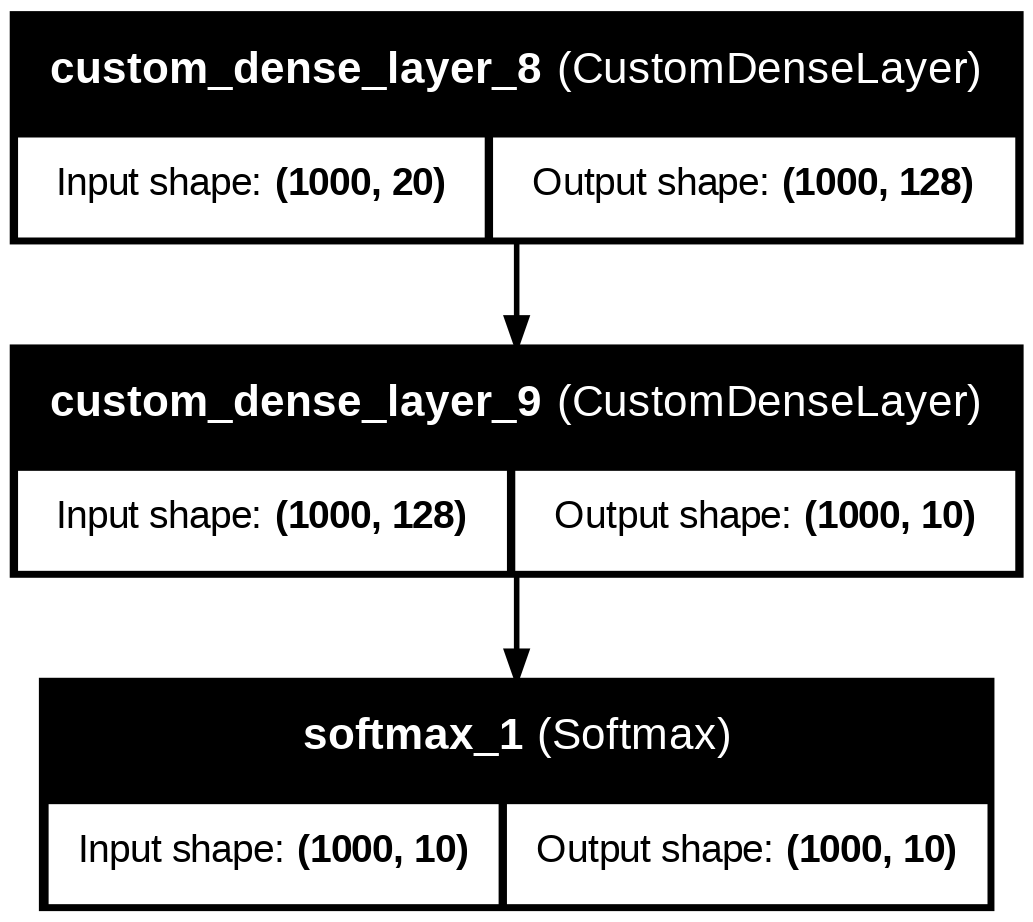

In [ ]:
tf.keras.utils.plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

## Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential([
    CustomDenseLayer(64),
    Dropout(0.5),
    CustomDenseLayer(10)
])

model.compile(optimizer="adam", loss="categorical_crossentropy")

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.6814
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8730
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9784
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0834
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5654
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4017
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3473
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3290
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3333
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3420


# Advanced Data Augmentation with Keras

## VGG

### VGG Pretrained Tensorflow Code

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input

In [ ]:
def vgg16_pretrained():
    return tf.keras.applications.VGG16(
        weights="imagenet",
        input_shape=(224, 224, 3),
        include_top=True
    )

vgg_model = vgg16_pretrained()

vgg_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

### VGG Manual Tensorflow Code

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input

In [ ]:
def build_vgg16(input_shape=(224, 224, 3), num_classes=1000):

    model = Sequential([
        ### 1st Conv Block
        Conv2D(64, (3,3), padding="same", activation="relu", input_shape=input_shape),
        Conv2D(64, (3,3), padding="same", activation="relu"),
        MaxPool2D((2,2), strides=2, name="block1_pool"),

        ### 2nd Conv Block
        Conv2D(128, (3,3), padding="same", activation="relu"),
        Conv2D(128, (3,3), padding="same", activation="relu"),
        MaxPool2D((2,2), strides=2, name="block2_pool"),

        ### 3rd Conv Block
        Conv2D(256, (3,3), padding="same", activation="relu"),
        Conv2D(256, (3,3), padding="same", activation="relu"),
        MaxPool2D((2,2), strides=2, name="block3_pool"),

        ### 4th Conv Block
        Conv2D(512, (3,3), padding="same", activation="relu"),
        Conv2D(512, (3,3), padding="same", activation="relu"),
        MaxPool2D((2,2), strides=2, name="block4_pool"),

        ### 5nd Conv Block
        Conv2D(512, (3,3), padding="same", activation="relu"),
        Conv2D(512, (3,3), padding="same", activation="relu"),
        MaxPool2D((2,2), strides=2, name="block5_pool"),

        ### Classification Head
        Flatten(name="flatten"),
        Dense(4096, activation="relu", name="fc1"),
        Dropout(0.5),
        Dense(4096, activation="relu", name="fc2"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax", name="predictions")
    ])

    return model

vgg_model = build_vgg16()

vgg_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

vgg_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 133,047,848 (507.54 MB)

 Trainable params: 133,047,848 (507.54 MB)

 Non-trainable params: 0 (0.00 B)

## Data Augmentation

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

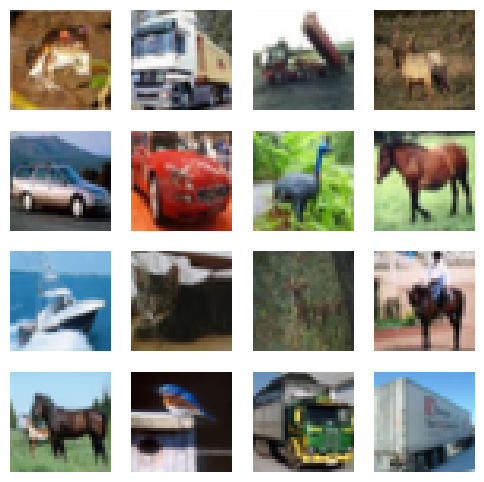

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

### Normalize - Before: RGB [255, 127, 64] → After: Normalized [1.0, 0.498, 0.251]
### Activations like ReLU produce meaningful gradients when inputs are in this range
# x_train = x_train.astype("float32") / 255.0
# x_test = x_test.astype("float32") / 255.0

plt.figure(figsize=(6, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.show()

### Create Sample.jpg For the Lab

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

### Basic Data Augmentation

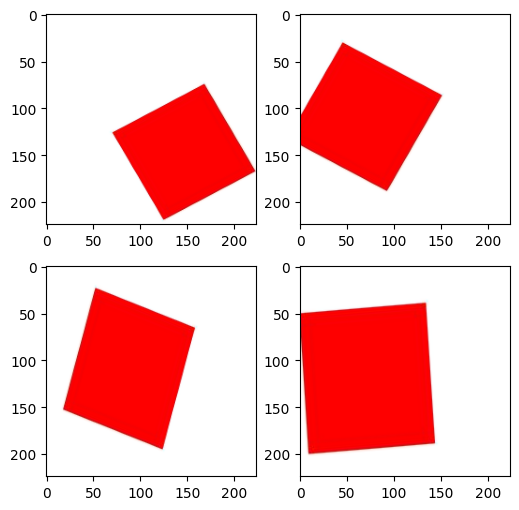

In [ ]:
image = Image.new("RGB", (224, 224), color=(255, 255, 255))

draw = ImageDraw.Draw(image)
draw.rectangle([(50,50), (174,174)], fill=(255, 0, 0))

image.save("sample.jpg")

img_path = "sample.jpg"
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

plt.figure(figsize=(6, 6))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(batch[0].astype("uint8"))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Feature-wise and sample-wise normalization

#### Key Differences Visualized

**Feature-wise (Channel)**
```Text
All Red Pixels → Normalized Together
All Green Pixels → Normalized Together
All Blue Pixels → Normalized Together
```

**Sample-wise (Per Image)**
```Text
Individual Image 1 → x̄=0, σ=1
Individual Image 2 → x̄=0, σ=1
Individual Image 3 → x̄=0, σ=1
```

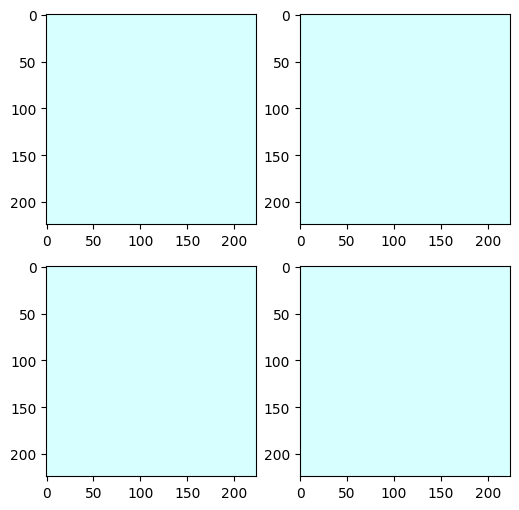

In [ ]:
image = Image.new("RGB", (224, 224), color=(255, 255, 255))

draw = ImageDraw.Draw(image)
draw.rectangle([(50,50), (174,174)], fill=(255, 0, 0))

image.save("sample.jpg")

img_path = "sample.jpg"
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

datagen.fit(x)

plt.figure(figsize=(6, 6))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(batch[0].astype("uint8"))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Custom data augmentation function

Apply a custom augmentation function that adds random noise to images

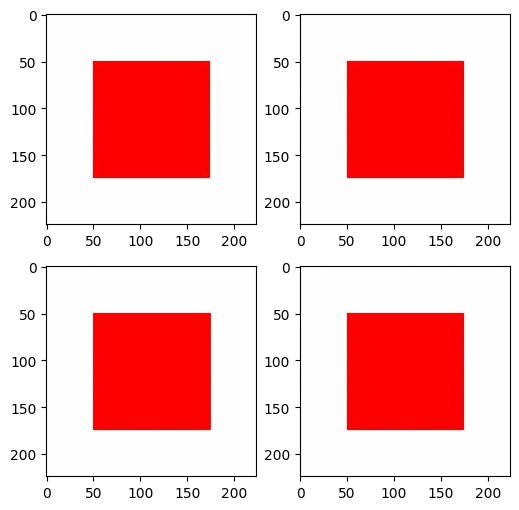

In [ ]:
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

plt.figure(figsize=(6, 6))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(batch[0].astype("uint8"))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# Transfer Learning

Fine-tune a pre-trained model

```Text
    Source Task (COCO Dataset)                          Target Task (Your Custom Data)
    ---------------------------                          ------------------------------
    [Animals, Vehicles, People]                          [Robots, Drones, Gadgets]
               ▲                                                     ▲
               │                                                     │
               ▼                                                     ▼
    ┌──────────────────────┐                             ┌──────────────────────┐
    │   Pre-Trained YOLO   │                             │   Custom YOLO Model  │
    │     (Backbone)       │                             │   (Detection Head)   │
    └──────────────────────┘                             └──────────────────────┘
               ║                      Transfer                       ║
               ║                      ───────>                       ║
               ║                  Frozen Backbone +                  ║
               ║              Retrained Detection Head               ║
               ▼                                                     ▼
    ┌───────────────────────┐                             ┌───────────────────────┐
    │   Feature Extractor   │                             │    Domain-Specific    │
    │ (Edges, Shapes, etc.) │                             │    Detection Logic    │
    └───────────────────────┘                             └───────────────────────┘
```

**When to Unfreeze Deeper Layers**

| Scenario | Recommendation |
| :------: | :------------: |
| Similar data to pre-training (e.g., animals → pets) | Unfreeze last 1-2 convolutional blocks |
| Moderately different data (e.g., natural → medical images) | Unfreeze most convolutional layers |
| Very small dataset (<1k images) | Only train the head; do not unfreeze |
| Large dataset (>10k images) | Unfreeze all layers |

## Create Images

In [ ]:
import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


## Build model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
### `include_top=False` allows us to add custom FC layers for our specific task/classes
### It only include the convolution blocks

### With include_top=True (Original VGG16)
### Input → Conv Blocks → Flatten → FC(4096) → FC(4096) → FC(1000)

### With include_top=False (Your Version)
### Input → Conv Blocks → [Add Your Custom Layers Here]

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)) ### Load Pre-trained model

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Train Model

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "sample_data",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: 0.0661
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: -6.9323
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: -12.3087
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: -17.7854
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: -23.3993
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: -29.1636
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: -35.0853
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: -41.1697
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: -47.4212
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: -53.8445


## Fine-Tune Model


```Text
|----------------------|----------------------|---------|
| Layer Name           | Output Shape         | Freeze? |
|----------------------|----------------------|---------|
| input_1              | (None, 224, 224, 3)  | N       |
| block1_conv1         | (None, 224, 224, 64) | N       |
| block1_conv2         | (None, 224, 224, 64) | N       |
| block1_pool          | (None, 112, 112, 64) | N       |
|----------------------|----------------------|---------|
| block2_conv1         | (None, 112, 112, 128)| N       |
| block2_conv2         | (None, 112, 112, 128)| N       |
| block2_pool          | (None, 56, 56, 128)  | N       |
|----------------------|----------------------|---------|
| block3_conv1         | (None, 56, 56, 256)  | N       |
| block3_conv2         | (None, 56, 56, 256)  | N       |
| block3_conv3         | (None, 56, 56, 256)  | N       |
| block3_pool          | (None, 28, 28, 256)  | N       |
|----------------------|----------------------|---------|
| block4_conv1         | (None, 28, 28, 512)  | N       |
| block4_conv2         | (None, 28, 28, 512)  | N       |
| block4_conv3         | (None, 28, 28, 512)  | N       |
| block4_pool          | (None, 14, 14, 512)  | N       |
|----------------------|----------------------|---------|
| block5_conv1         | (None, 14, 14, 512)  | Y       |
| block5_conv2         | (None, 14, 14, 512)  | Y       |
| block5_conv3         | (None, 14, 14, 512)  | Y       |
| block5_pool          | (None, 7, 7, 512)    | Y       |
|----------------------|----------------------|---------|
```

Why do we need to unfreeze the **last 4 layer** / the **last block**?
1. Hierarchical Feature Location
  * **Shallow layers (Block 1-3):** Basic edges / textures (Common Features)
  * **Mid layers (Block 4):** Moderate-complexity patterns
  * **Deep layers (Block 5):** High-level semantic features (Object)
2. Domain Adaption
  * Preserve early-layer features (edge detection)
  * Adjust to your unique characteristics
  * Modify detection of complex shapes in your images

In [ ]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(train_generator, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: -60.4438
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -335.2504
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: -1474.6418
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: -4670.5220
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: -12152.2881
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -27510.9375
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -55973.8516
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -104988.1484
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -184633.4219
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: -308393.6875


## Visualize Training and Validation Loss

Found 16 images belonging to 3 classes.
Found 4 images belonging to 3 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: -494046.2500 - val_accuracy: 0.5000 - val_loss: -764013.4375
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -764013.4375 - val_accuracy: 0.5000 - val_loss: -1146646.3750
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -1146646.3750 - val_accuracy: 0.5000 - val_loss: -1676859.2500
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: -1676859.2500 - val_accuracy: 0.5000 - val_loss: -2397363.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -2397363.0000 - val_accuracy: 0.5000 - val_loss: -3360149.5000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -3360149.5000 - val_accuracy: 0.5000 - val_loss: -4628514.5000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.5000 - loss: -4628514.5000 

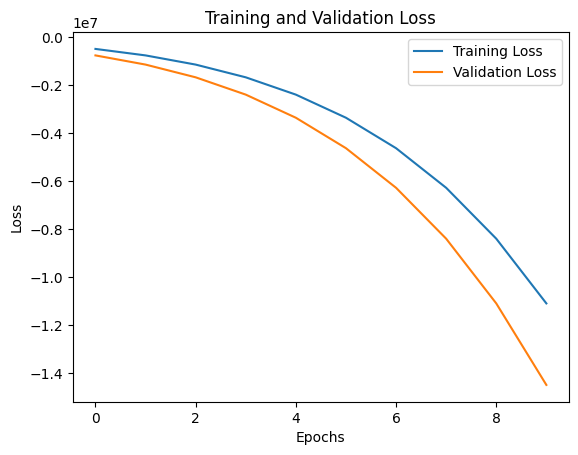

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Experiment with Different Optimizers

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: -14487664.0000 - val_accuracy: 0.5000 - val_loss: -6355010555092868968480768.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: -6355010555092868968480768.0000 - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accur

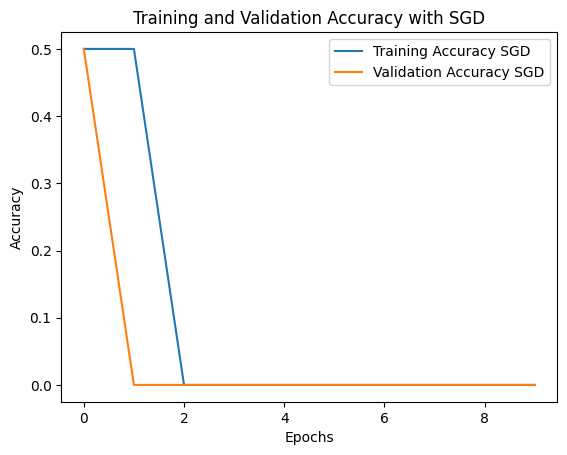

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: -14487664.0000 - val_accuracy: 0.5000 - val_loss: -29724886.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: -29724886.0000 - val_accuracy: 0.5000 - val_loss: -51438448.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: -51438448.0000 - val_accuracy: 0.5000 - val_loss: -81174496.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -81174496.0000 - val_accuracy: 0.5000 - val_loss: -120380672.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -120380672.0000 - val_accuracy: 0.5000 - val_loss: -170484272.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -170484272.0000 - val_accuracy: 0.5000 - val_loss: -232914720.0000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: -232914720.0000 - val_accuracy: 0.5000 - val_loss: -309112352.0000
Epoch 

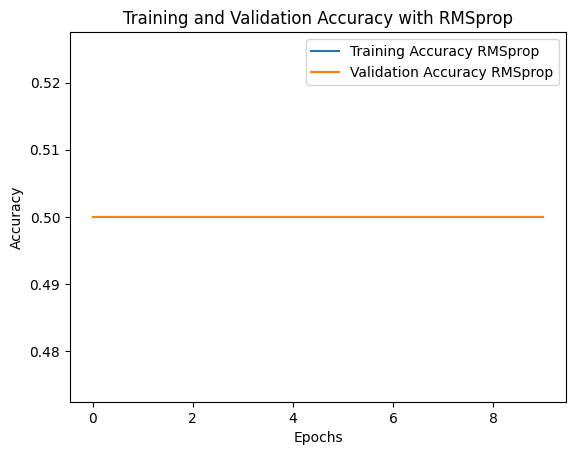

In [ ]:
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

def reset_model(model):
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights()) ### Inherit the original weights to clone model
    return model_clone

initial_model = reset_model(model)

### With SGD optimizer
sgd_model = reset_model(initial_model)
sgd_model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

### Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### With RMSprop optimizer
rmsprop_model = reset_model(initial_model)
rmsprop_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_rsmprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

### Plot training and validation accuracy for RMSprop
plt.plot(history_rsmprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rsmprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluate the Model on a Test Set

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "sample_data",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Found 20 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: -14487664.0000
Test Accuracy: 50.00%
Test Loss: -14487664.0000


## Tips for Transfer Learning Implementation

1. **Choose the right pre-trained model:** Select a model trained on a dataset similar to your target task to enhance performance. Popular models like VGG16, ResNet, or InceptionV3 are particularly effective for image-related tasks. Ensure that the architecture aligns with your specific problem requirements.

2. **Freeze early layers:** In the initial training stages, freeze the early layers of the pre-trained model to preserve their learned features. This approach is beneficial when working with small datasets or datasets that closely resemble the original dataset the model was trained on.

3. **Fine-tune later layers:** As training progresses, gradually unfreeze the deeper layers and fine-tune them. These layers capture task-specific features, and fine-tuning allows the model to adapt better to the nuances of your new dataset.

4. **Adjust learning rates:** Use a lower learning rate for fine-tuning to prevent catastrophic forgetting of the pre-trained knowledge. High learning rates during this phase can disrupt the learned features and degrade model performance.

5. **Use data augmentation:** Implement data augmentation techniques, particularly for image tasks, to increase variability within the dataset. This practice helps prevent overfitting and enhances the model's ability to generalize.

6. **Consider domain adaptation:** If there is a significant disparity between the domain of the pre-trained model and your target task, consider applying domain adaptation techniques. These methods can help align the source and target datasets, improving the model's performance.

# Transpose Convolution

In [1]:
import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D

import numpy as np
import matplotlib.pyplot as plt

## Define Layers

In [3]:
input_layer = Input(shape=(28, 28, 1))

### Create convolution layer with 32 3x3 filters
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same")(input_layer)

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(conv_layer)

## Define Model

In [4]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

## Compile Model

In [5]:
model.compile(optimizer="adam", loss="mean_squared_error")

## Train model

In [6]:
X_train = np.random.rand(1000, 28, 28, 1)

# For reconstruction, the target is the input
y_train = X_train

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0838 - val_loss: 0.0675
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0618 - val_loss: 0.0439
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0387 - val_loss: 0.0238
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0206 - val_loss: 0.0124
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0109 - val_loss: 0.0072
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0066 - val_loss: 0.0049
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0024 - val_loss: 0.0021


## Evaluate Model

In [8]:
X_test = np.random.rand(200, 28, 28, 1)

y_test = X_test

loss = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021
Test loss: 0.002109656110405922


## Visualize Results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


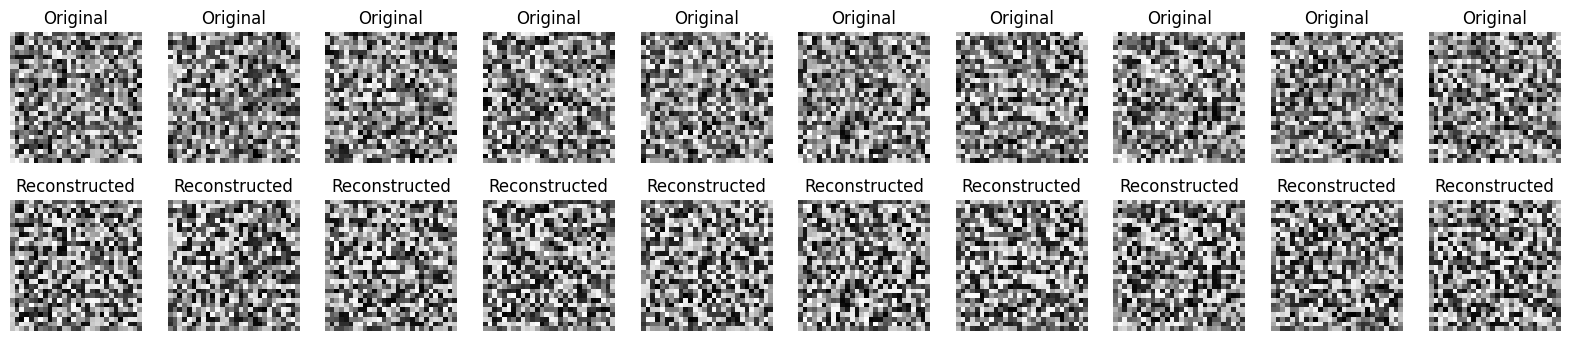

In [9]:
y_pred = model.predict(X_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_pred[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

## Experiment with Different Kernel Sizes

In [10]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(28, 28, 1))

conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same")(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation="sigmoid", padding="same")(conv_layer)

model = Model(inputs=input_layer, outputs=transpose_conv_layer)

model.compile(optimizer="adam", loss="mean_squared_error")

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0724 - val_loss: 0.0422
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0343 - val_loss: 0.0148
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0117 - val_loss: 0.0058
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0022 - val_loss: 0.0022
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0022
Test loss: 0.002157009206712246


## Add Dropout Layers

In [12]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(28, 28, 1))

conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same")(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(dropout_layer)

model = Model(inputs=input_layer, outputs=transpose_conv_layer)

model.compile(optimizer="adam", loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0778 - val_loss: 0.0575
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0539 - val_loss: 0.0349
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0343 - val_loss: 0.0195
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0222 - val_loss: 0.0112
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0159 - val_loss: 0.0076
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0128 - val_loss: 0.0059
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0113 - val_loss: 0.0050
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102 - val_loss: 0.0043
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0095 - val_loss: 0.0038
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0089 - val_loss: 0.0034
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035
Test loss: 0.0034660547971725464


## Different Activation Functions

In [13]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1327 - val_loss: 0.0521
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0419 - val_loss: 0.0215
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0179 - val_loss: 0.0101
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0039 - val_loss: 0.0038
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039
Test loss: 0.0038407680112868547
